In [159]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

# concat all stats
def concat_stats(model, lang):
    n = pd.read_csv(f'../data/human/{model}/{lang}/none/{lang}.pred_stats.csv')
    a = pd.read_csv(f'../data/human/{model}/{lang}/anti/{lang}.pred_stats.csv')
    p = pd.read_csv(f'../data/human/{model}/{lang}/pro/{lang}.pred_stats.csv')
    aw = pd.read_csv(f'../data/human/{model}/{lang}/anti_wmt/{lang}.pred_stats.csv')
    pw = pd.read_csv(f'../data/human/{model}/{lang}/pro_wmt/{lang}.pred_stats.csv')

    stats = pd.DataFrame([n.mean(axis=0), a.mean(axis=0), p.mean(axis=0), aw.mean(axis=0), pw.mean(axis=0)])
    new_row = [f'{model}_{lang}', n.mean(axis=0)['acc'], (n.mean(axis=0)['f1_m']-n.mean(axis=0)['f1_f']), (p.mean(axis=0)['f1_m']-a.mean(axis=0)['f1_f']), (pw.mean(axis=0)['f1_m']-aw.mean(axis=0)['f1_f'])]

    stats.insert(0, 'stereotype', [f'{model}_{lang}', 'anti', 'pro', 'anti_wmt', 'pro_wmt'])

    return stats, new_row
    
file_exists = os.path.isfile('pred_stats.csv')

table = []
with open(f'../data/pred_stats.csv', 'w') as f:
    for model in ['bing', 'google', 'systran', 'aws']:
        for lang in ['it', 'fr', 'uk', 'ru', 'es', 'he', 'ar']:
            stats,row = concat_stats(model, lang)
            table.append(row)
            if file_exists:
                stats.to_csv('../data/pred_stats.csv', mode='a', index=False, header=None)
            else:
                stats.to_csv('../data/pred_stats.csv', mode='a', index=False)
                file_exists = True
    for lang in ['it', 'fr', 'uk', 'ru', 'es']:
        stats,row = concat_stats('deepl',lang)
        table.append(row)
        stats.to_csv('../data/pred_stats.csv', mode='a', index=False, header=None)

new_df = pd.DataFrame(table, columns=['stereotype', 'acc', 'delta-G', 'delta-S', 'delta-S_wmt'])
new_df = new_df.round(1)
new_df.to_csv('../data/table.csv', index=False)

In [54]:
def concat_job_stats(model, lang):
    n = pd.read_csv(f'../data/human/{model}/{lang}/none/{lang}.pred.csv', names=['translated_professions','target_indices','target_sentences','gender_prediction','ds'])
    a = pd.read_csv(f'../data/human/{model}/{lang}/anti/{lang}.pred.csv', names=['translated_professions','target_indices','target_sentences','gender_prediction','ds'])
    p = pd.read_csv(f'../data/human/{model}/{lang}/pro/{lang}.pred.csv', names=['translated_professions','target_indices','target_sentences','gender_prediction','ds'])
    aw = pd.read_csv(f'../data/human/{model}/{lang}/anti_wmt/{lang}.pred.csv', names=['translated_professions','target_indices','target_sentences','gender_prediction','ds'])
    pw = pd.read_csv(f'../data/human/{model}/{lang}/pro_wmt/{lang}.pred.csv', names=['translated_professions','target_indices','target_sentences','gender_prediction','ds'])
 
    jobs = pd.read_csv('./german/statistics_dataset/job_data_dataset_.csv', sep=',', names=['job','gender','2cnd','idx','ab_code','job_class','total','perc','stereotype'])
    n = n.tail(-1)
    a = a.tail(-1)
    p = p.tail(-1)
    aw = aw.tail(-1)
    pw = pw.tail(-1)

    n_jobs_temp = [item.strip('[').strip(']').split("', '")[3].strip("'") for idx,item in n['ds'].items()]
    n_gender_temp = [item.strip('[').strip(']').split("', '")[0].strip("'") for idx,item in n['ds'].items()]

    a_jobs_temp = [item.strip('[').strip(']').split("', '")[3].strip("'") for idx,item in a['ds'].items()]
    a_gender_temp = [item.strip('[').strip(']').split("', '")[0].strip("'") for idx,item in a['ds'].items()]

    p_jobs_temp = [item.strip('[').strip(']').split("', '")[3].strip("'") for idx,item in p['ds'].items()]
    p_gender_temp = [item.strip('[').strip(']').split("', '")[0].strip("'") for idx,item in p['ds'].items()]

    aw_jobs_temp = [item.strip('[').strip(']').split("', '")[3].strip("'") for idx,item in aw['ds'].items()]
    aw_gender_temp = [item.strip('[').strip(']').split("', '")[0].strip("'") for idx,item in aw['ds'].items()]

    pw_jobs_temp = [item.strip('[').strip(']').split("', '")[3].strip("'") for idx,item in pw['ds'].items()]
    pw_gender_temp = [item.strip('[').strip(']').split("', '")[0].strip("'") for idx,item in pw['ds'].items()]

    n_jobs = pd.DataFrame([n_jobs_temp, n_gender_temp, n['gender_prediction']]).T
    a_jobs = pd.DataFrame([a_jobs_temp, a_gender_temp, a['gender_prediction']]).T
    p_jobs = pd.DataFrame([p_jobs_temp, p_gender_temp, p['gender_prediction']]).T
    aw_jobs = pd.DataFrame([aw_jobs_temp, aw_gender_temp, aw['gender_prediction']]).T
    pw_jobs = pd.DataFrame([pw_jobs_temp, pw_gender_temp, pw['gender_prediction']]).T
 
    for idx, row in n_jobs.iterrows():
        job_temp = jobs[jobs['job'] == row[0]]['job_class']
        n_jobs.loc[idx, 'job_class'] = job_temp.values[0]

    for idx, row in a_jobs.iterrows():
        job_temp = jobs[jobs['job'] == row[0]]['job_class']
        a_jobs.loc[idx, 'job_class'] = job_temp.values[0]
    
    for idx, row in p_jobs.iterrows():
        job_temp = jobs[jobs['job'] == row[0]]['job_class']
        p_jobs.loc[idx, 'job_class'] = job_temp.values[0]
    
    for idx, row in aw_jobs.iterrows():
        job_temp = jobs[jobs['job'] == row[0]]['job_class']
        aw_jobs.loc[idx, 'job_class'] = job_temp.values[0]

    for idx, row in pw_jobs.iterrows():
        job_temp = jobs[jobs['job'] == row[0]]['job_class']
        pw_jobs.loc[idx, 'job_class'] = job_temp.values[0]
    
    return n_jobs, a_jobs, p_jobs, aw_jobs, pw_jobs

for model in ['bing', 'google', 'systran', 'aws']:
    for lang in ['it', 'fr', 'uk', 'ru', 'es', 'he', 'ar']:
        n,a,p,aw,pw = concat_job_stats(model, lang)
        n.to_csv(f'../data/pred_job_stats_{model}.csv', mode='a', index=False, header=None)
for lang in ['it', 'fr', 'uk', 'ru', 'es']:
    n,a,p,aw,pw = concat_job_stats('deepl',lang)
    n.to_csv(f'../data/pred_job_stats_deepl.csv', mode='a', index=False, header=None)
    # a.to_csv(f'../data/pred_job_stats_deepl.csv', mode='a', index=False)
    # p.to_csv(f'../data/pred_job_stats_deepl.csv', mode='a', index=False)
    # aw.to_csv(f'../data/pred_job_stats_deepl.csv', mode='a', index=False)
    # pw.to_csv(f'../data/pred_job_stats_deepl.csv', mode='a', index=False)
    

bing
female:
0.3773185441907048
0.47572799258719783


/var/folders/10/gpm1mn557dq4z3fzgrpvk2700000gn/T/ipykernel_30898/3514312766.py:73: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


google
female:
0.43754961651773855
0.5503890792879573


/var/folders/10/gpm1mn557dq4z3fzgrpvk2700000gn/T/ipykernel_30898/3514312766.py:73: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


systran
female:
0.3113526465635777
0.2731996420696784


/var/folders/10/gpm1mn557dq4z3fzgrpvk2700000gn/T/ipykernel_30898/3514312766.py:73: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


aws
female:
0.3479306735446057
0.3478494534810782


/var/folders/10/gpm1mn557dq4z3fzgrpvk2700000gn/T/ipykernel_30898/3514312766.py:73: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/10/gpm1mn557dq4z3fzgrpvk2700000gn/T/ipykernel_30898/3514312766.py:73: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


deepl
female:
0.18929411426841736
0.39079210579463236


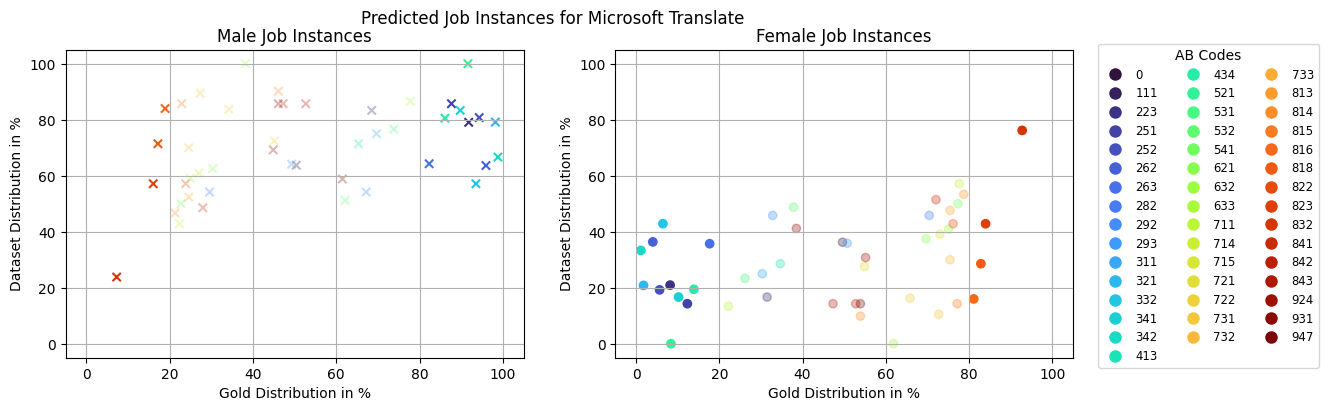

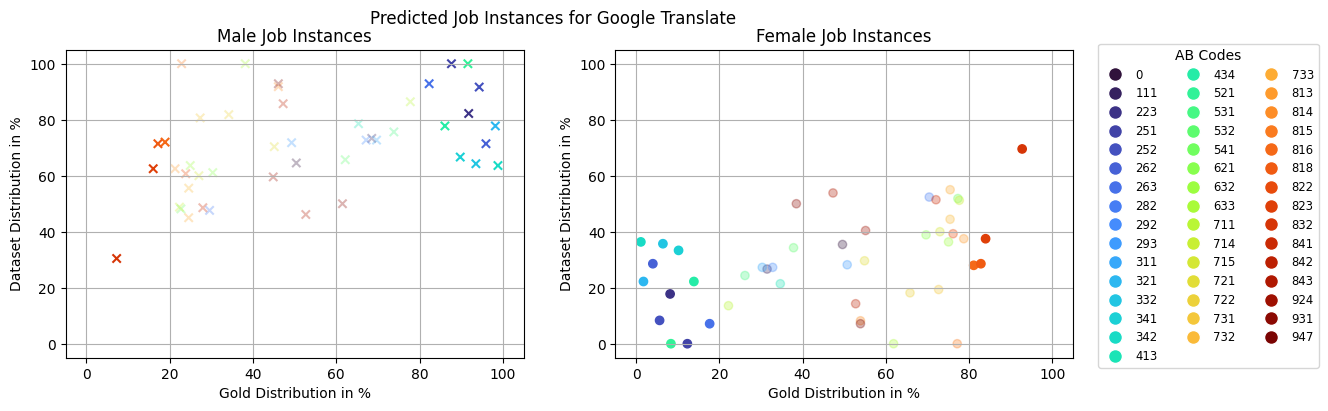

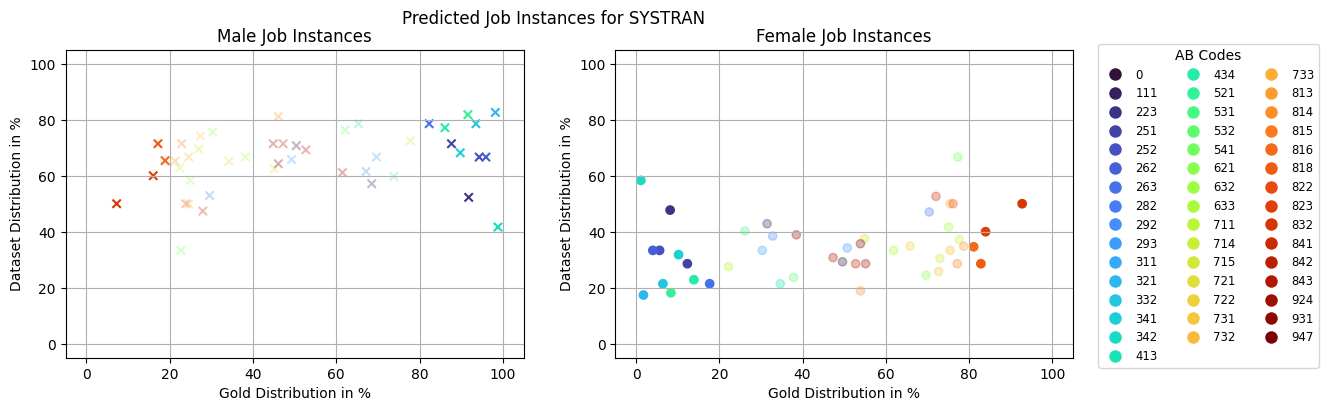

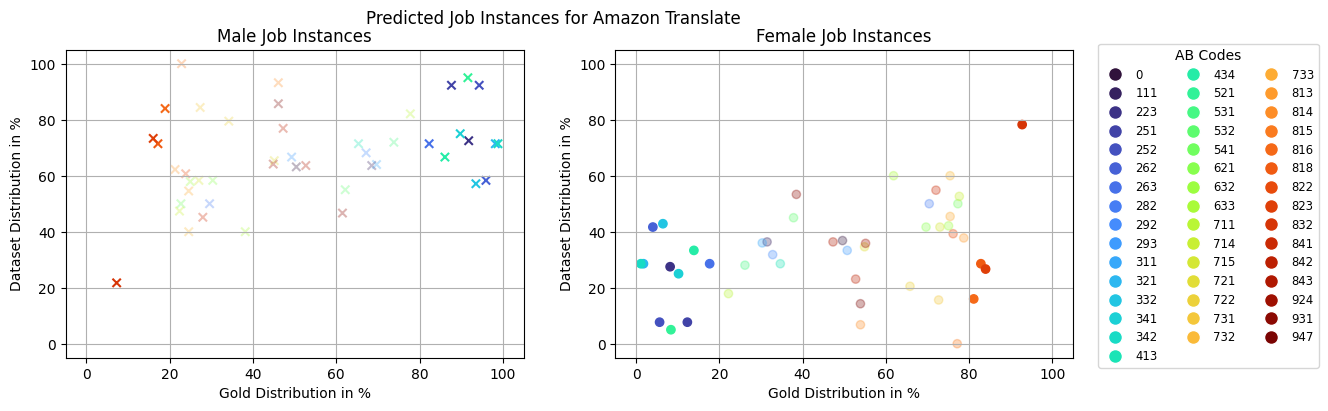

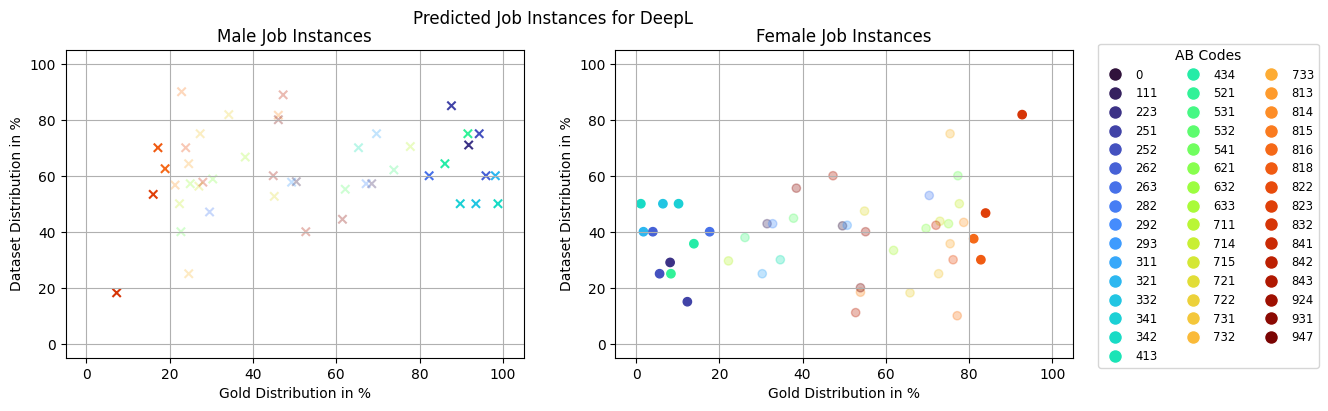

In [1]:
import seaborn as sns
import scipy.stats as sp
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

names = ['Microsoft Translate', 'Google Translate', 'SYSTRAN', 'Amazon Translate', 'DeepL']
for i, mt in enumerate(['bing', 'google', 'systran', 'aws', 'deepl']):
    df = pd.read_csv(f'../data/job_instances/pred_{mt}_job_stats.csv')
    df.sort_values(by=['ab_code'], inplace=True)

    df['female_perc'] = df['female'] / (df['male'] + df['female']) * 100
    df['male_perc'] = df['male'] / (df['male'] + df['female']) * 100

    bar_min = 20
    bar_max = 80
    alpha = 0.3

    filtered_df_f = df[(df['gold_female_perc'] > bar_max) | (df['gold_female_perc'] < bar_min)].dropna()
    filtered_df_m = df[(df['gold_male_perc'] > bar_max) | (df['gold_male_perc'] < bar_min)].dropna()

    print(mt)
    print('female:')
    print(df['gold_female_perc'].corr(df['female_perc']))
    print(filtered_df_f['gold_female_perc'].corr(filtered_df_f['female_perc']))

    gender_markers = {
    'Female': 'o',  # Circle for Female
    'Male': 'x',    # X for Male
    }

    num_job_classes = 46

    # Create a colormap with distinct colors
    cmap = plt.get_cmap('turbo')  # You can choose a different colormap if you prefer

    # Generate a list of distinct colors for each job class
    job_class_colors = [cmap(i) for i in np.linspace(0, 1, num_job_classes)]

    # Create a figure and axis
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 4))
    
    pl1 = ax1.scatter(y=df['male_perc'], x=df['gold_male_perc'], c= job_class_colors, alpha=np.where((df['gold_male_perc'] >= bar_min) & (df['gold_male_perc'] <= bar_max), alpha, 1.0), label='Male', marker='x')
    pl2 = ax2.scatter(y=df['female_perc'], x= df['gold_female_perc'],c= job_class_colors,alpha=np.where((df['gold_female_perc'] >= bar_min) & (df['gold_female_perc'] <= bar_max), alpha, 1.0), marker='o', )

    ax1.set_yticks(np.arange(0, 101, 20))
    ax1.set_ylim(ymin=-5, ymax=105)
    ax1.set_xlim(xmin=-5, xmax=105)
    ax2.set_yticks(np.arange(0, 101,20))
    ax2.set_ylim(ymin=-5, ymax=105)
    ax2.set_xlim(xmin=-5, xmax=105)

    # Adding labels and title
    ax1.set_xlabel('Gold Distribution in %')
    ax2.set_xlabel('Gold Distribution in %')
    ax1.set_ylabel('Dataset Distribution in %')
    ax2.set_ylabel('Dataset Distribution in %')
    ax1.set_title('Male Job Instances')
    ax2.set_title('Female Job Instances')
    ax1.grid(True)
    ax2.grid(True)

    ab_code_to_color = dict(zip(df['ab_code'], job_class_colors))
    # Create legend handles and labels for each ab_code
    legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=ab_code, 
                                markerfacecolor=color, markersize=10)
                    for ab_code, color in ab_code_to_color.items()]

    # Add the legend to the plot
    fig.legend(handles=legend_handles, title='AB Codes', loc='center left', fontsize='small', ncol=3, bbox_to_anchor=(0.915, 0.49))
    fig.suptitle(f'Predicted Job Instances for {names[i]}')

    fig.show()

    fig.savefig(f'../data/figures/pred_{mt}_job_stats.png', bbox_inches='tight')

    #df.to_csv(f'../data/job_instances/pred_{mt}_job_stats.csv', index=False)

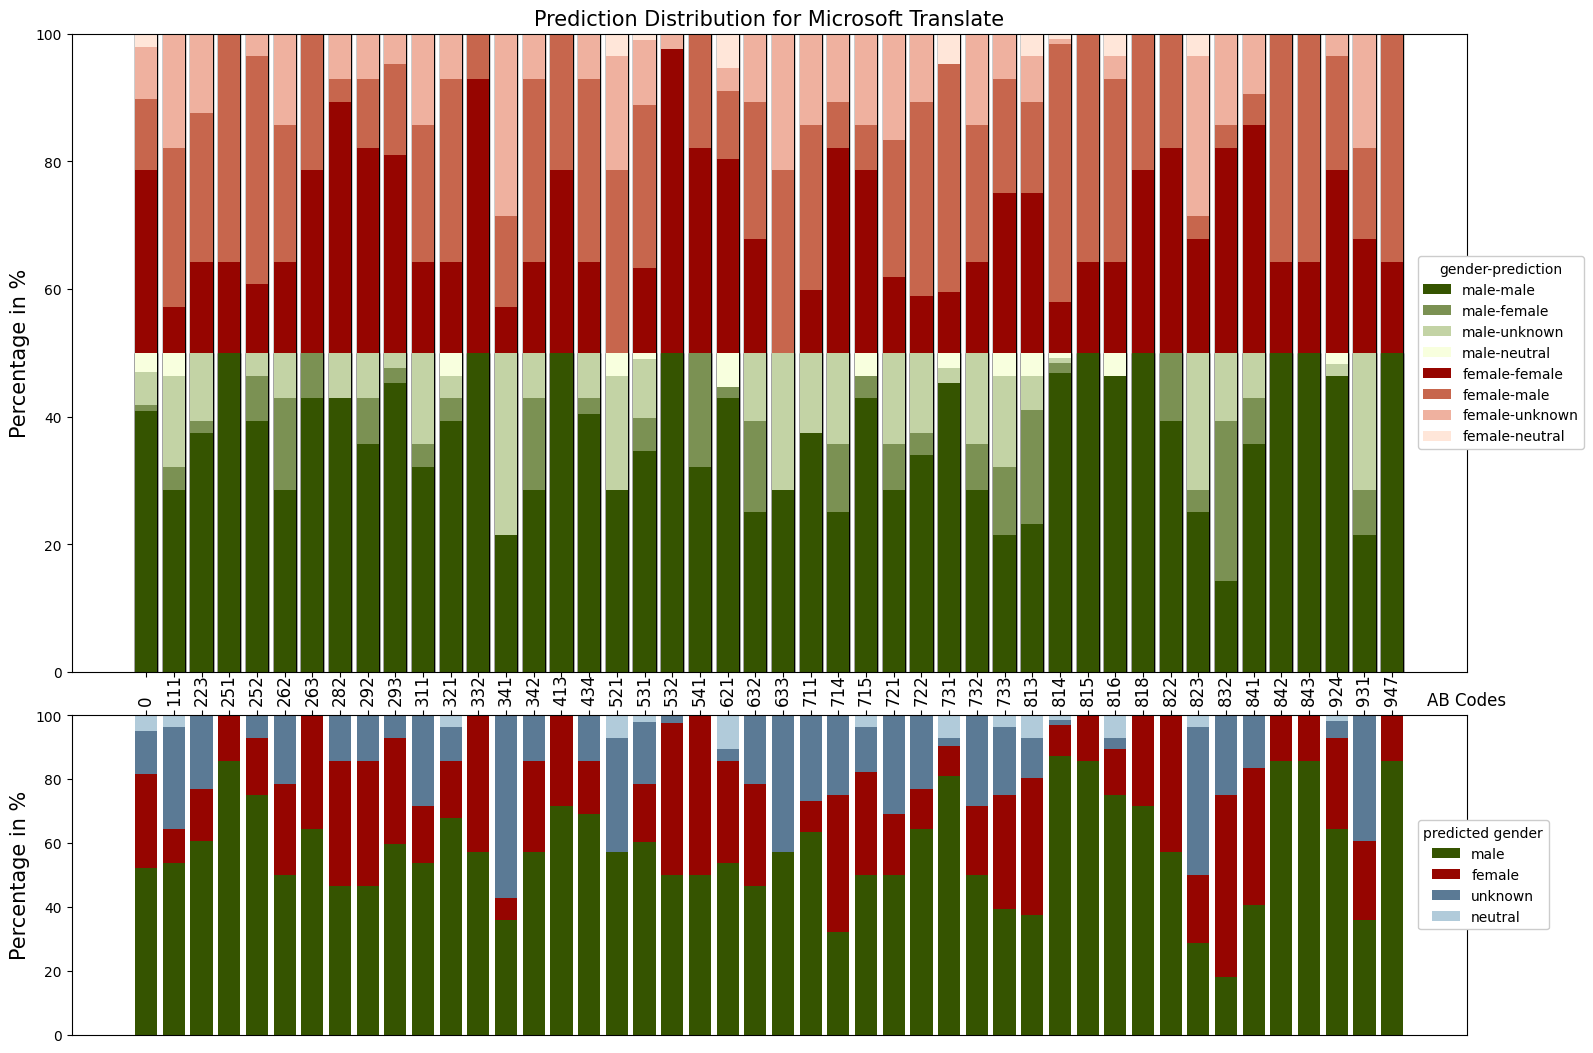

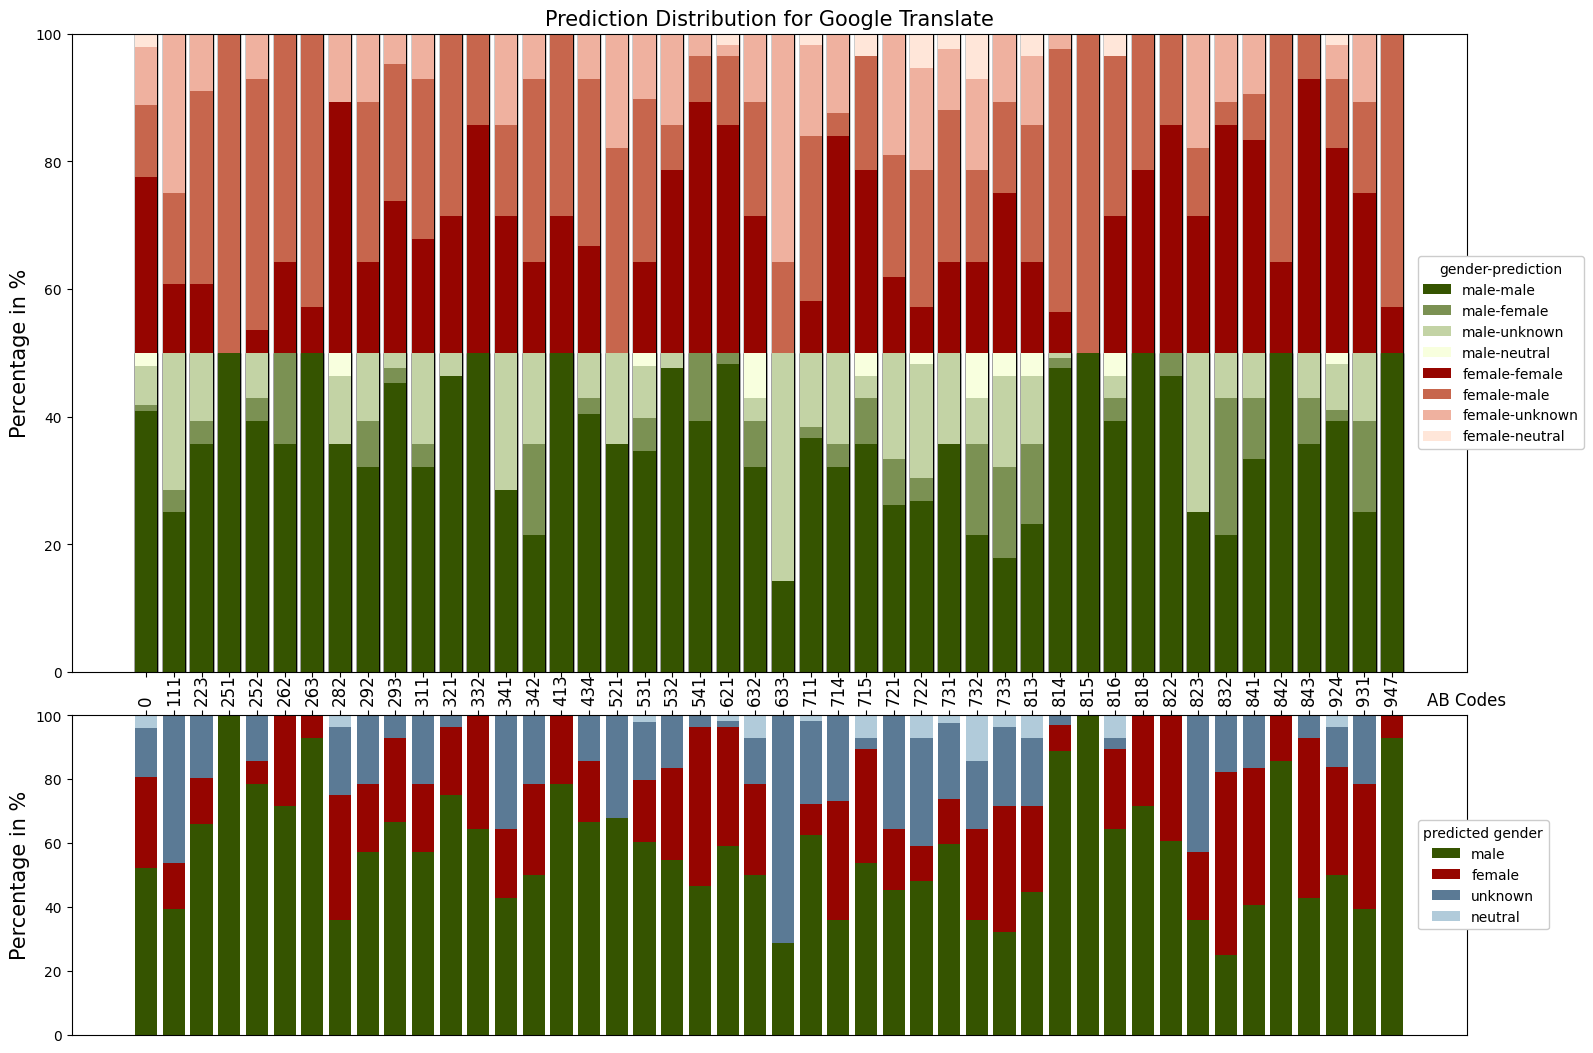

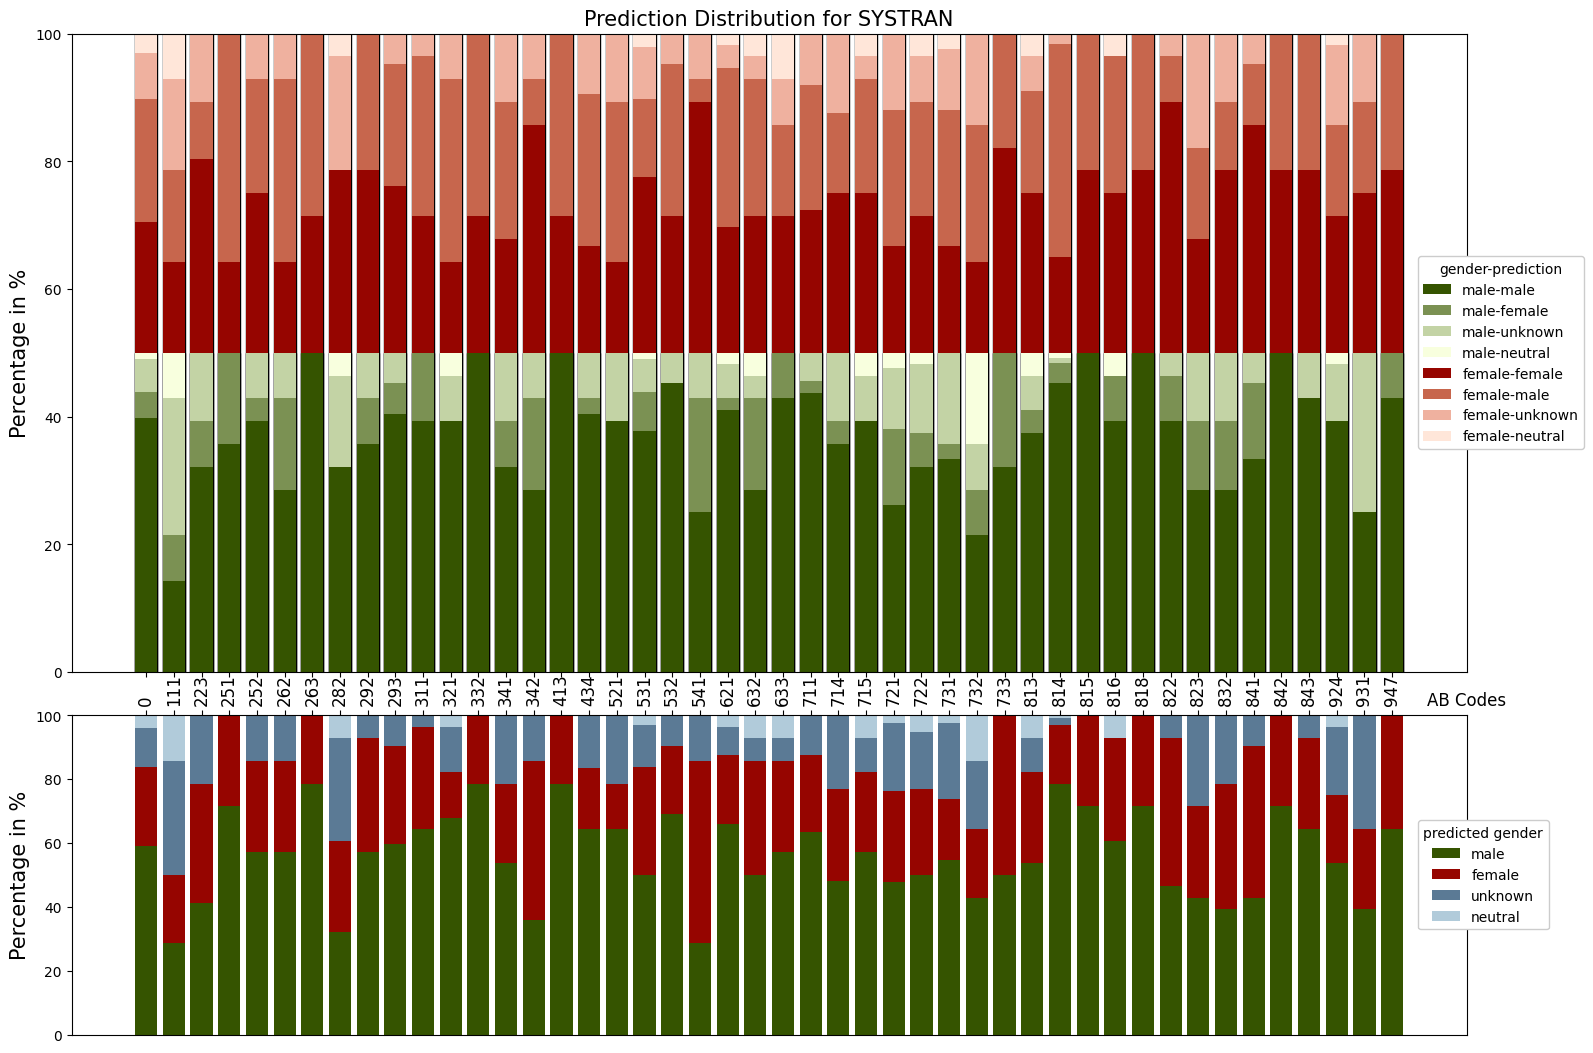

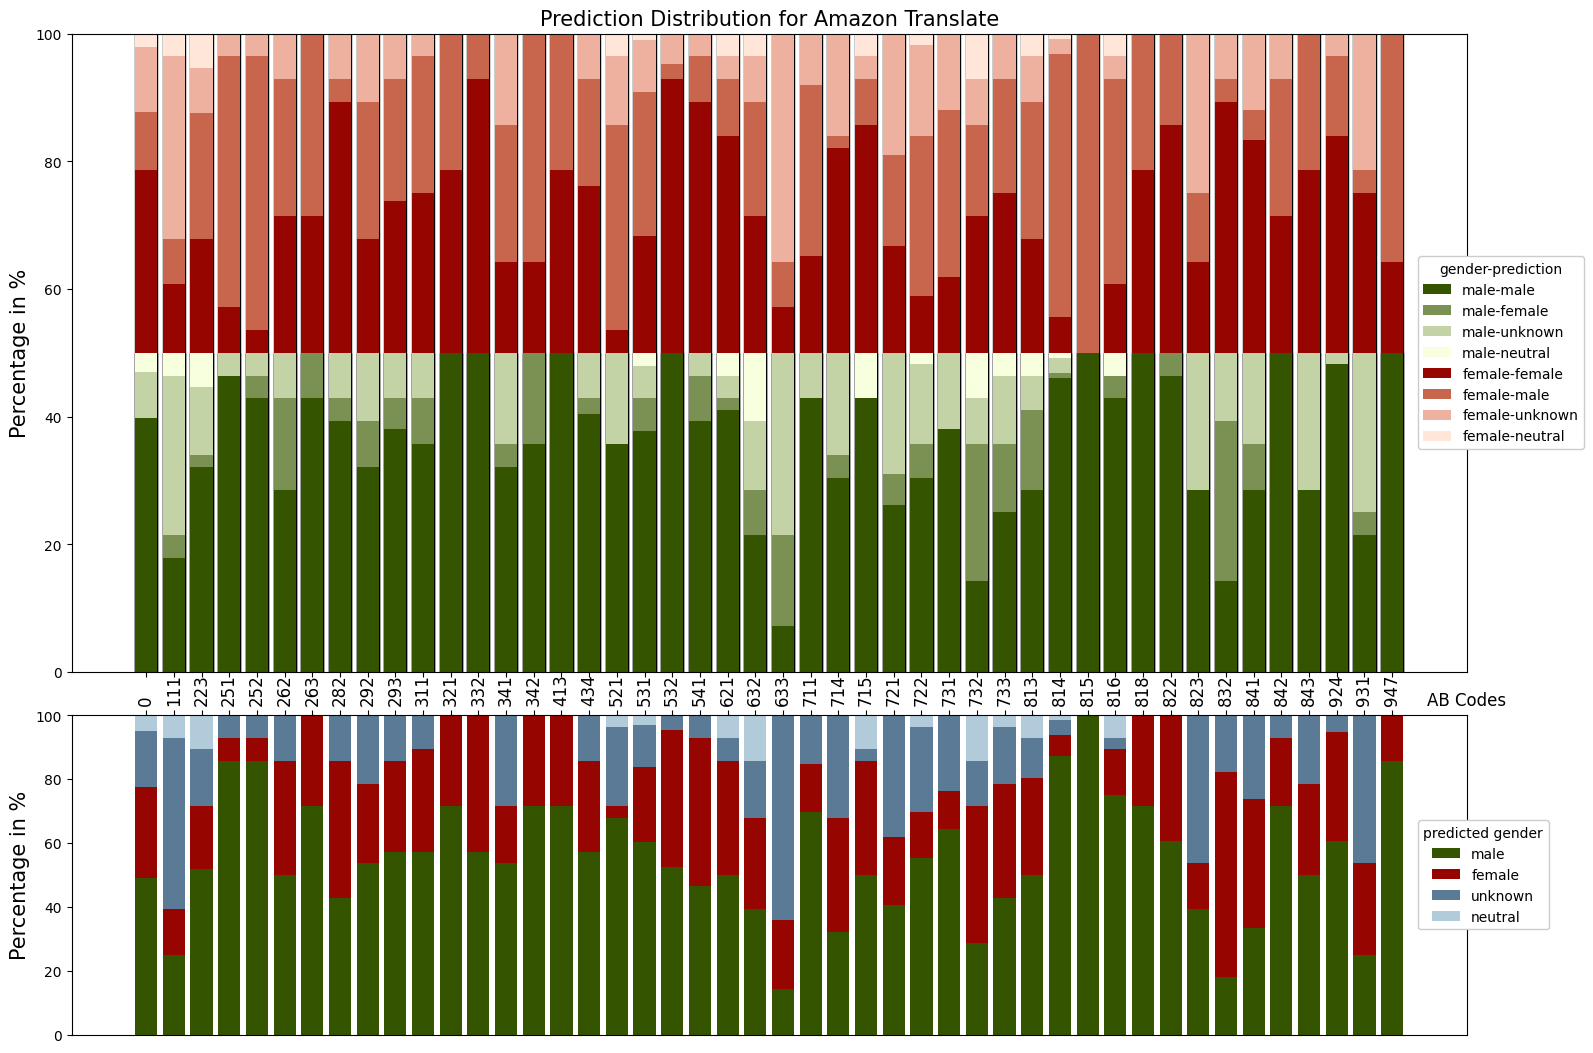

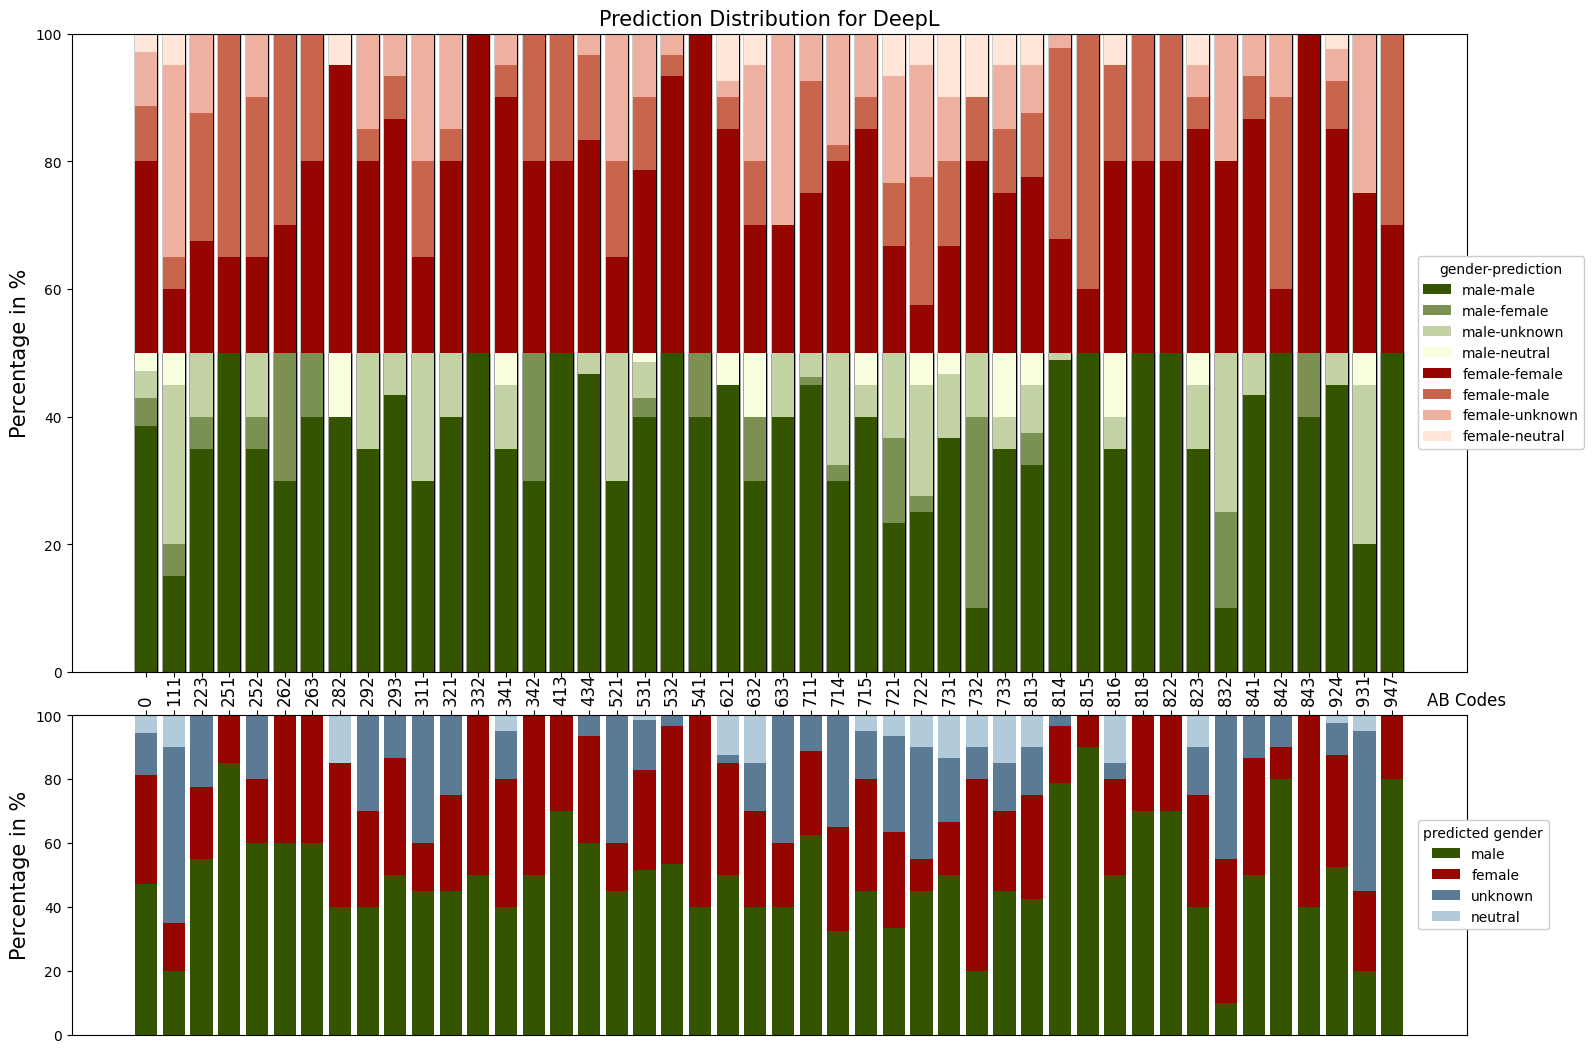

In [466]:

names = ['Microsoft Translate', 'Google Translate', 'SYSTRAN', 'Amazon Translate', 'DeepL']
for i, mt in enumerate(['bing', 'google', 'systran', 'aws', 'deepl']):
    df = pd.read_csv(f'../data/job_instances/pred_jobs/pred_job_stats_{mt}.csv', names= ['name', 'gold_gender', 'pred_gender', 'job_class'])

    grouped_df = df.groupby(["job_class", "gold_gender", 'pred_gender']).size().reset_index(name="count")
    ab_codes = pd.read_csv('../src/german/statistics_dataset/job_data_arbeitsamt_.csv')
    ab_codes = ab_codes.rename(columns={'name':'job_class'})
    ab_codes = ab_codes[['job_class', 'ab_code']]
    grouped = grouped_df.merge(ab_codes, on='job_class')

    grouped['total_count'] = grouped.groupby(['ab_code', 'gold_gender'])['count'].transform('sum')
    # Calculate the percentage with respect to 'gold_female' and 'gold_male' 
    grouped['perc'] = ((grouped['count'] / grouped['total_count']) * 100)/2

    no_neutral = grouped.groupby(['ab_code','gold_gender'])['pred_gender'].apply(lambda x: 'GENDER.neutral' not in x.values)
    no_unknown = grouped.groupby(['ab_code','gold_gender'])['pred_gender'].apply(lambda x:'GENDER.unknown' not in x.values)
    no_male = grouped.groupby(['ab_code','gold_gender'])['pred_gender'].apply(lambda x:'GENDER.male' not in x.values)
    no_female = grouped.groupby(['ab_code','gold_gender'])['pred_gender'].apply(lambda x:'GENDER.female' not in x.values)

    to_add = []
    for idx, (jc, gg, pg, cnt, ab, tc, perc) in grouped.iterrows():
        if no_neutral[ab][gg] == True:
            to_add.append([jc,gg, 'GENDER.neutral',0, ab, 0, 0])
        if no_unknown[ab][gg] == True:
            to_add.append([jc,gg,'GENDER.unknown',0, ab, 0, 0])
        if no_male[ab][gg] == True:
            to_add.append([jc,gg,'GENDER.male',0, ab, 0, 0])
        if no_female[ab][gg] == True:
            to_add.append([jc,gg,'GENDER.female',0, ab, 0, 0])
    
    to_add_df = pd.DataFrame(to_add)
    to_add_df.columns = grouped.columns
    to_add_df = to_add_df.drop_duplicates().reset_index(drop=True)

    grouped = pd.concat([grouped, to_add_df]).sort_values(by=['ab_code', 'gold_gender'])
    
    #grouped_df.to_csv(f'../data/job_instances/pred_jobs/pred_job_stats_{mt}_grouped.csv', index=False)

    x = np.arange(len(grouped['ab_code'].unique()))

    m = grouped[grouped['gold_gender'] == 'male']
    mmale = m[m['pred_gender']=='GENDER.male'].reset_index(drop=True)
    mfemale = m[m['pred_gender']=='GENDER.female'].reset_index(drop=True)
    munknown = m[m['pred_gender']=='GENDER.unknown'].reset_index(drop=True)
    mneutral = m[m['pred_gender']=='GENDER.neutral'].reset_index(drop=True)

    f = grouped[grouped['gold_gender'] == 'female']
    fmale = f[f['pred_gender']=='GENDER.male'].reset_index(drop=True)
    ffemale = f[f['pred_gender']=='GENDER.female'].reset_index(drop=True)
    funknown = f[f['pred_gender']=='GENDER.unknown'].reset_index(drop=True)
    fneutral = f[f['pred_gender']=='GENDER.neutral'].reset_index(drop=True)

    fig, (ax1,ax2) = plt.subplots(2,1, figsize= (18,13), sharex=ax1, gridspec_kw={'height_ratios': [2, 1]}) 
    plt.subplots_adjust(hspace=0.09)

    ax1.bar(x, 50, color='#000000', edgecolor='black')
    ax1.bar(x, 100, color='#000000', edgecolor='black')

    ax1.bar(x, mmale['perc'], color='#355400', label='male-male')
    ax1.bar(x, mfemale['perc'], bottom=mmale['perc'], color='#7b9153',label='male-female')
    ax1.bar(x, munknown['perc'], bottom=mmale['perc']+mfemale['perc'], color='#c3d3a5', label='male-unknown')
    ax1.bar(x, mneutral['perc'], bottom=mmale['perc']+mfemale['perc']+munknown['perc'], color='#f8ffde', label='male-neutral')
    ax1.bar(x, ffemale['perc'], bottom=mmale['perc']+mfemale['perc']+munknown['perc']+mneutral['perc'],color='#960500', label='female-female')
    ax1.bar(x, fmale['perc'], bottom=mmale['perc']+mfemale['perc']+munknown['perc']+mneutral['perc']+ffemale['perc'], color='#c7664d', label='female-male')
    ax1.bar(x, funknown['perc'], bottom=mmale['perc']+mfemale['perc']+munknown['perc']+mneutral['perc']+fmale['perc']+ffemale['perc'], color='#efb19f', label='female-unknown')
    ax1.bar(x, fneutral['perc'], bottom=mmale['perc']+mfemale['perc']+munknown['perc']+mneutral['perc']+fmale['perc']+ffemale['perc']+funknown['perc'], color='#ffe6d9', label='female-neutral')

    ax1.set_ylabel('Percentage in %', fontsize=15)
    ax1.set_title(f'Prediction Distribution for {names[i]}', fontsize=15)    
    ax1.set_xticks(x, grouped['ab_code'].unique(), rotation=90, fontsize=12)
    ax1.set_ylim(0,100)
    ax1.legend(title='gender-prediction', loc='center left', bbox_to_anchor=(0.96, 0.5), ncol=1, framealpha=1)
    ax1.set_xlabel('AB Codes', fontsize=12)
    ax1.xaxis.set_label_coords(1, -0.03)

    all = grouped.groupby(['ab_code', 'pred_gender'])['perc'].sum().reset_index(name="total_perc")

    male = all[all['pred_gender'] == 'GENDER.male'].reset_index(drop=True)
    female = all[all['pred_gender'] == 'GENDER.female'].reset_index(drop=True)
    neutral = all[all['pred_gender'] == 'GENDER.neutral'].reset_index(drop=True)
    unknown = all[all['pred_gender'] == 'GENDER.unknown'].reset_index(drop=True)

    ax2.bar(x, male['total_perc'], color='#355400', label='male')
    ax2.bar(x, female['total_perc'],bottom=male['total_perc'], color='#960500', label='female')
    ax2.bar(x, unknown['total_perc'], bottom = male['total_perc']+female['total_perc'], color='#5b7a95', label='unknown')
    ax2.bar(x, neutral['total_perc'], bottom = male['total_perc']+female['total_perc']+unknown['total_perc'], color='#b1cbda', label='neutral')

    ax2.set_ylabel('Percentage in %', fontsize=15)
    ax2.xaxis.tick_top()
    ax2.set_xticks(x, grouped['ab_code'].unique(), rotation=90, fontsize=12)
    ax2.legend(title='predicted gender', loc='center left', bbox_to_anchor=(0.96, 0.5), ncol=1, framealpha=1)
    plt.savefig(f'../data/figures/pred_{mt}_job_stats_grouped_with_all.png', bbox_inches='tight')
